In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [11]:
housing = fetch_california_housing()
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [27]:
houses_data=pd.DataFrame(housing.data,columns=housing.feature_names)
houses_data["price"] = pd.Series(housing.target)

houses_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [28]:
# Some information about dataset
houses_data.info()
houses_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [29]:
houses_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [30]:
Features = houses_data.drop(["price"],axis=1)
Target = houses_data["price"]

In [34]:
scaler = StandardScaler()
scaler.fit(Features)
Features_sts=scaler.transform(Features)


In [36]:
Features_train_full,Features_test,Target_train_full,Target_test = train_test_split(Features_sts,Target , test_size= 0.20 , random_state=100)
Features_train , Features_val,Target_train , Target_val = train_test_split(Features_train_full,Target_train_full,test_size=0.10,random_state=100)

In [37]:
print("f_train  = ",Features_train.shape ," t_train = ", Target_train.shape)
print("f_test   = ",Features_test.shape ," t_test = ", Target_test.shape)
print("f_valid  = ",Features_val.shape ," t_valid = ", Target_val.shape)

f_train  =  (14860, 8)  t_train =  (14860,)
f_test   =  (4128, 8)  t_test =  (4128,)
f_valid  =  (1652, 8)  t_valid =  (1652,)


In [41]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100,activation="relu" , input_shape = Features_train.shape[1:]))
model.add(keras.layers.Dense(25,activation="relu" ))
model.add(keras.layers.Dense(25,activation="relu" ))
model.add(keras.layers.Dense(25,activation="relu" ))
model.add(keras.layers.Dense(25,activation="relu" ))
model.add(keras.layers.Dense(8,activation="relu"))
model.add(keras.layers.Dense(1,activation="relu"))
print(model.summary())



c:\Users\hp\anaconda3\envs\mine\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         2,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,592 (21.84 KB)

 Trainable params: 5,592 (21.84 KB)

 Non-trainable params: 0 (0.00 B)

None


In [42]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae"])


In [43]:
history = model.fit(Features_train,Target_train,epochs=100,batch_size=128,validation_data=(Features_val,Target_val))

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.4141 - mae: 1.1698 - val_loss: 0.7371 - val_mae: 0.6669
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5961 - mae: 0.5819 - val_loss: 0.6521 - val_mae: 0.6542
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4952 - mae: 0.5109 - val_loss: 0.5159 - val_mae: 0.5304
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4509 - mae: 0.4826 - val_loss: 0.4617 - val_mae: 0.4957
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4190 - mae: 0.4618 - val_loss: 0.4889 - val_mae: 0.4846
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4013 - mae: 0.4509 - val_loss: 0.4177 - val_mae: 0.4687
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3885 - mae: 0.4420 - val_loss: 0.4773 - val_mae: 0.4755
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3778 - mae: 0.4365 - val_loss: 0.4789 - val_mae: 0.5300
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

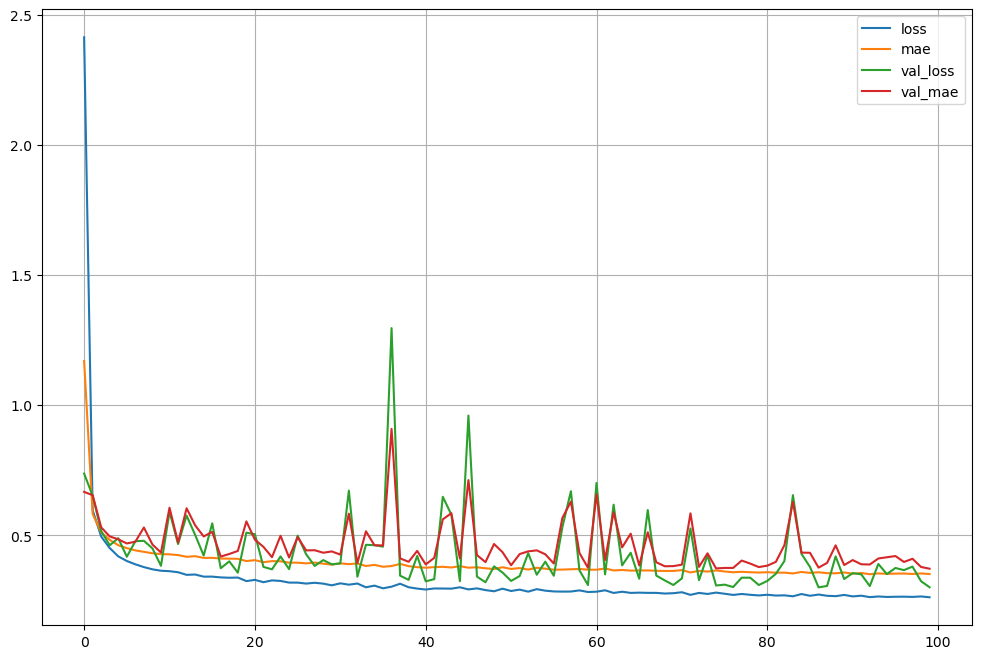

-----------------------------------------------------------------------
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2707 - mae: 0.3537
Loss                   :  0.2706810235977173
Mean Absolute Error     :  0.3536992073059082


In [45]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(Features_test, Target_test)
print("Loss                   : ",model_evaluate[0])
print("Mean Absolute Error     : ",model_evaluate[1])